## SECOM Data Set Information

A complex modern semi-conductor manufacturing process is normally under consistent surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. It is often the case  that useful information is buried in the latter two. Engineers typically have a much larger number of signals than are actually required. If we consider each type  of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs.

Numerical data are recorded values from a series of sensors in the production machines that are placed in specified locations to help identify the part of the production process which contributes to the faults.


# Objective
To minimize the rate at which faulty products leave the factory, the numerical data starts to make sense. 

*   To enhance current business improvement techniques, we use feature selection techniques to rank features according to their impact on the overall yield for the product. 

    *   Causal relationships may also be considered with a view to identifying the key features.

Dimensionality reduction techniques:

- Percent Missing Values
- Ammount of Variation
- Pairwise Correlation
- Correlation with Target
- Recursive feature elimination

In [11]:
%pip install matplotlib --upgrade


[notice] A new release of pip available: 22.2.2 -> 23.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [70]:
%pip install "numpy<1.24.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 323.3 kB/s eta 0:00:0000:0100:02
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.23.5 which is incompatible.
ydata-profiling 4.1.0 requires matplotlib<3.7,>=3.2, but you have matplotlib 3.7.1 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.23.5 which is incompatible.
glue-core 1.0.1 requires jupyter-client<7, but you have jupyter-client 7.4.9 which is incompatible.

[notice] A new release of pip available: 22.2.2 -> 23.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<h2 id="importing_libraries">Importing required libraries</h2>


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

from scipy import stats


import warnings
import os

warnings.filterwarnings('ignore')
%matplotlib inline

# Data Understanding / Descriptive Analysis
1. Histogram of percentage of missing values of features
2. Histogram of volatilites of features
2. 
3. Frequency distribution of target values
4. Correlation heatmap

# Manufacturing Operation Data (a.k.a Feature Data/Sensor Data)

In [3]:
# Read Manufacturing Operation Data (Feature Data/Sensor Data)
sensor_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data",sep=" ", header=None)
sensor_data

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [4]:
# Data types in Feature Data
type_dct_features = {str(k): len(list(v)) for k, v in sensor_data.groupby(sensor_data.dtypes, axis=1)}
type_dct_features

{'float64': 590}

In [5]:
# Add prefix "feature" to each column
sensor_data = sensor_data.add_prefix("feature")

# Descriptive analysis of whole data

In [565]:
# create dataframe for descriptive analysis 
descriptive_sensor = sensor_data.describe().transpose()

# add column for number of unique values of each column
descriptive_sensor["unique"] = sensor_data.nunique()

# add column for percentage of missing values of each column
descriptive_sensor["missing_percentage"] = sensor_data.isnull().sum() * 100 / len(sensor_data)

# Define outliers based on Z-score
def outliers_z_score(df,n):
    outliers_list = []
    threshold = n

    for i in df.columns:
        ys = df[i]
        try:
            mean_y = np.mean(ys)
            stdev_y = np.std(ys)
            z_scores = [(y - mean_y) / stdev_y for y in ys]
            idx_outliers = np.where(np.abs(z_scores) > threshold)
            outliers_list.append(len(idx_outliers[0]))
        except:
            outliers_list.append(np.NAN)
    return outliers_list

# add column for number of outliers of each column
outlierls3s = outliers_z_score(sensor_data,3)
descriptive_sensor["outliers(3s)"] = outlierls3s

outlierls4s = outliers_z_score(sensor_data,4)
descriptive_sensor["outliers(4s)"] = outlierls4s

# add column for variance of each column
descriptive_sensor["coeff_var"] = descriptive_sensor["std"]/np.absolute(descriptive_sensor["mean"])

In [110]:
descriptive_sensor

,count,mean,std,min,25%,50%,75%,max,unique,missing_percentage,outliers(3s),outliers(4s),coeff_var
feature0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500,1520,0.382897,16.0,2.0,0.024423
feature1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400,1504,0.446713,18.0,4.0,0.032217
feature2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667,507,0.893427,12.0,7.0,0.013412
feature3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.21440,1591.223500,3715.0417,518,0.893427,32.0,12.0,0.316313
feature4,1553.0,4.197013,56.355540,0.6815,1.017700,1.31680,1.525700,1114.5366,503,0.893427,4.0,4.0,13.427535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature585,1566.0,3.067826,3.578033,1.1975,2.306500,2.75765,3.295175,99.3032,1502,0.063816,2.0,2.0,1.166309
feature586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.02050,0.027600,0.1028,322,0.063816,12.0,10.0,0.575912
feature587,1566.0,0.016475,0.008808,0.0032,0.010600,0.01480,0.020300,0.0799,260,0.063816,22.0,11.0,0.534603
feature588,1566.0,0.005283,0.002867,0.0010,0.003300,0.00460,0.006400,0.0286,120,0.063816,23.0,10.0,0.542663


# Semiconductor Quality Data (a.k.a Target Data)

In [14]:
# Read semiconductor quality data (target)
target_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data",sep=" ",header=None)
target_data

In [16]:
# Data types in Label Data
type_dct = {str(k): len(list(v)) for k, v in target_data.groupby(target_data.dtypes, axis=1)}
type_dct

{'int64': 1, 'object': 1}

In [17]:
# Change column names
target_data.columns = ["Label","Time"]

# Convert type of columns
target_data["Label"] = target_data["Label"].astype("category")

# Convert format of Time Column as datetime
target_data["Time"] = pd.to_datetime(target_data["Time"])

## Distribution of Target Labels

Text(0.5, 1.0, 'Distribution of Target Labels (Whole Data)')

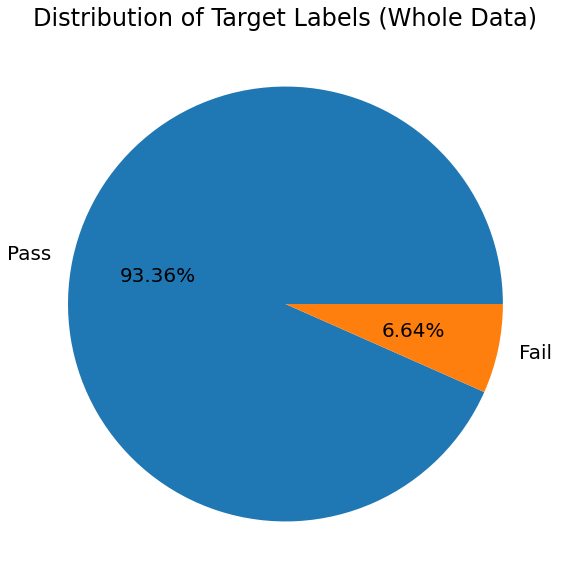

In [592]:
# Set size of chart
plt.figure(figsize = (10,10))

# Labels for data
keys = ['Pass','Fail']

# Plotting data on Pie chart
Piechart_Labels = plt.pie(target_data.Label.value_counts(), labels=keys, autopct='%.2f%%', textprops={'fontsize': 20})

# Add title to the chart
plt.title('Distribution of Target Labels (Whole Data)',fontdict={'size':24})

## Timeseries of Target Label Frequencies (Pass/Fail)

In [19]:
import datetime as dt

# Create a Date column from Time (timestamp) Column of Label Data 
target_data["Date"] = target_data["Time"].dt.date

# check first and last dates of Label Data
print("first date = {}".format(target_data["Date"].min()))
print("last date = {}".format(target_data["Date"].max()))

# Create a Dataframe by Grouping Labels by Date and calculating the frequencies (count) of Label Values
timeseries_label_count = pd.DataFrame(target_data.groupby("Date")["Label"].value_counts())

# Rename Calculated column as "Count"
timeseries_label_count = timeseries_label_count.rename(columns={'Label': 'Count'})

# Reset index of grouped Dataframe
timeseries_label_count.reset_index(inplace=True)

# Rename Label values as Pass and Fail
timeseries_label_count["Label"] = timeseries_label_count["Label"].replace(to_replace=[-1, 1], value=["Pass","Fail"])


first date = 2008-01-08
last date = 2008-12-10


Text(0, 0.5, 'Frequency')

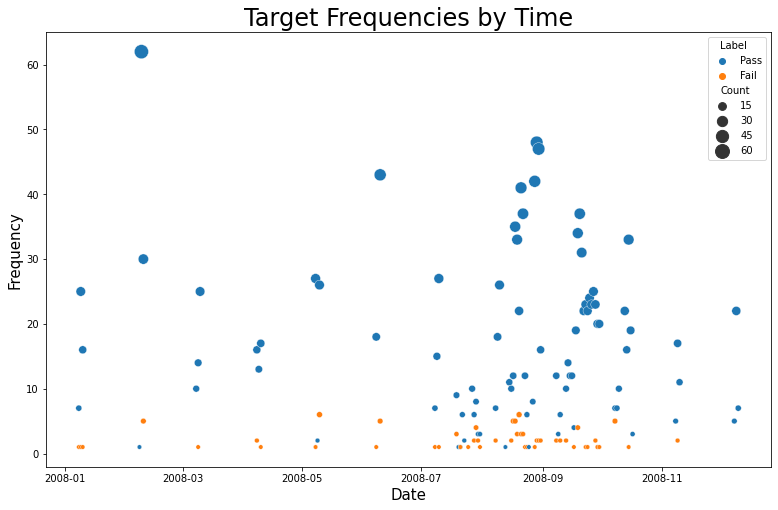

In [20]:
# Set size of chart
plt.figure(figsize = (13,8))

# create the scatter plot
timeseries_label_scatterplot = sns.scatterplot(data=timeseries_label_count, x="Date", y="Count", size = "Count", hue="Label", sizes=(20, 200))

timeseries_label_scatterplot.set_title('Target Frequencies by Time', fontdict={'size':24})
timeseries_label_scatterplot.set_xlabel('Date',fontdict={'size':15})
timeseries_label_scatterplot.set_ylabel('Frequency', fontdict={'size':15})

# Create train and test dataset

1. First we merge the data
2. Then we drop the Date and Time columns since we don't need them anymore.
3. According to dataset's description, target values are highly imbalanced, so we split it in a stratified fashion.

In [22]:
# Merge sensor and label data
merged_df = pd.concat([target_data,sensor_data],axis=1)
merged_df.drop(["Date","Time"], axis=1, inplace=True)

# Create training and test datasets
X = merged_df.drop(["Label"],axis=1)
Y = merged_df["Label"]


# Split data into train and test by 80%-20% in a stratified fashion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify=Y)

# Descriptive Statistics of Target Train/Test Data

Text(0.5, 1.0, 'Distribution of Target Labels (Train Set)')

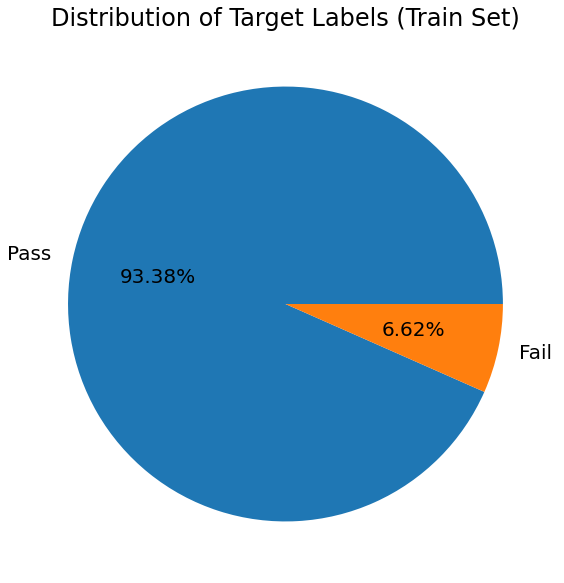

In [593]:
# Set size of chart
plt.figure(figsize = (10,10))

# Labels for data
keys = ['Pass','Fail']

# Plotting data on Pie chart
Piechart_Labels_train = plt.pie(Y_train.value_counts(), labels=keys, autopct='%.2f%%', textprops={'fontsize': 20})

# Add title to the chart
plt.title('Distribution of Target Labels (Train Set)',fontdict={'size':24})

Text(0.5, 1.0, 'Distribution of Target Labels (Test Set)')

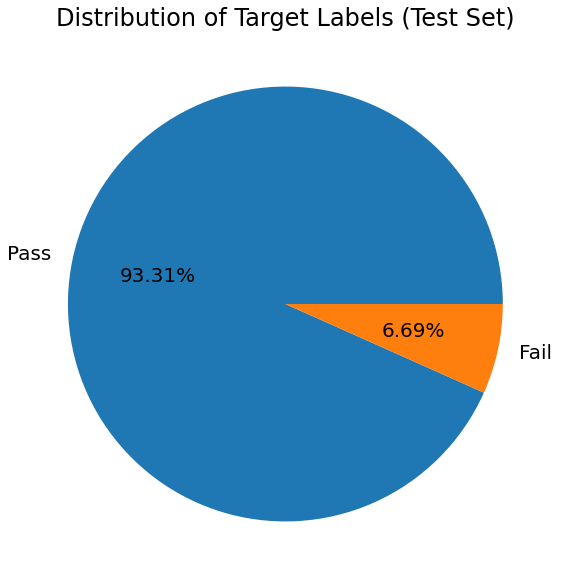

In [594]:
# Set size of chart
plt.figure(figsize = (10,10))

# Labels for data
keys = ['Pass','Fail']

# Plotting data on Pie chart
Piechart_Labels_train = plt.pie(Y_test.value_counts(), labels=keys, autopct='%.2f%%', textprops={'fontsize': 20})

# Add title to the chart
plt.title('Distribution of Target Labels (Test Set)',fontdict={'size':24})

# Descriptive Statistics of Feature Train Set

In [141]:
print("shape of feature train set :{} and shape of feature test set: {}".format(X_train.shape, X_test.shape))
print("shape of label train set :{} and shape of label test set: {}".format(Y_train.shape, Y_test.shape))

X_train

shape of feature train set :(1253, 590) and shape of feature test set: (314, 590)
shape of label train set :(1253,) and shape of label test set: (314,)


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589
1198,3075.32,2491.07,2185.1000,1201.0491,0.7821,100.0,105.8489,0.1208,1.4002,-0.0151,...,NaN,NaN,0.4974,0.0128,0.0033,2.5767,0.0223,0.0105,0.0034,47.0690
436,3071.58,2489.47,2217.3777,1425.1041,1.7585,100.0,106.2556,0.1200,1.5270,0.0066,...,0.0022,16.6695,0.5004,0.0316,0.0066,6.3183,0.0329,0.0055,0.0022,16.6695
635,3017.53,2524.09,2201.0667,880.2317,1.4148,100.0,106.5478,0.1211,1.3720,-0.0005,...,NaN,NaN,0.4998,0.0097,0.0026,1.9495,0.0328,0.0235,0.0068,71.5333
996,2901.62,2569.45,2223.9000,1745.3724,1.9974,100.0,96.7567,0.1241,1.5950,-0.0163,...,NaN,NaN,0.5004,0.0174,0.0034,3.4771,0.0200,0.0205,0.0061,102.5241
782,2982.59,2466.86,2117.5889,894.0996,1.4330,100.0,106.4944,0.1253,1.4418,-0.0096,...,NaN,NaN,0.4986,0.0172,0.0038,3.4561,0.0373,0.0079,0.0030,21.0599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,3058.89,2504.38,2221.9444,1551.6947,1.5296,100.0,99.2678,0.1222,1.4068,0.0057,...,NaN,NaN,0.5018,0.0460,0.0097,9.1677,-0.0012,0.0220,0.0072,0.0000
365,2988.92,2460.91,2178.0778,941.9524,0.8039,100.0,104.0167,0.1229,1.5829,-0.0278,...,0.0045,46.4165,0.4976,0.0148,0.0032,2.9645,0.0291,0.0135,0.0045,46.4165
1420,2975.74,2517.35,2162.5556,1041.0369,1.4305,100.0,100.4111,0.1238,1.4968,-0.0201,...,0.0020,23.6431,0.4994,0.0115,0.0033,2.3077,0.0299,0.0071,0.0020,23.6431
113,2928.16,2523.21,2210.6111,1184.6481,1.2577,100.0,102.9356,0.1201,1.4453,-0.0126,...,0.0047,293.2614,0.5016,0.0160,0.0035,3.1882,0.0049,0.0144,0.0047,293.2614


In [569]:
# create dataframe for descriptive analysis 
descriptive_train = X_train.describe().transpose()

# add column for number of unique values of each column
descriptive_train["unique"] = X_train.nunique()

# add column for percentage of missing values of each column
descriptive_train["missing_percentage"] = X_train.isnull().sum() * 100 / len(sensor_data)

# add column for number of outliers of each column
outlierls3s_ = outliers_z_score(X_train,3)
descriptive_train["outliers(3s)"] = outlierls3s_

outlierls4s_ = outliers_z_score(X_train,4)
descriptive_train["outliers(4s)"] = outlierls4s_

# add column for coefficient of variance of each column
descriptive_train["coeff_var"] = descriptive_train["std"]/np.absolute(descriptive_train["mean"])
descriptive_train["coeff_var"] = descriptive_train["coeff_var"].fillna(0)

In [595]:
descriptive_train

,count,mean,std,min,25%,50%,75%,max,unique,missing_percentage,outliers(3s),outliers(4s),coeff_var
feature0,1246.0,3014.185899,73.067217,2743.2400,2965.68500,3011.4050,3056.202500,3356.3500,1212,0.446713,12.0,2.0,0.024241
feature1,1248.0,2496.611378,80.102790,2162.8700,2454.68250,2500.2200,2539.595000,2846.4400,1207,0.319081,17.0,3.0,0.032085
feature2,1240.0,2200.151328,29.445513,2060.6600,2181.15550,2200.9556,2218.055500,2315.2667,473,0.829611,10.0,6.0,0.013383
feature3,1240.0,1387.511151,431.115520,711.0258,1080.49850,1283.4368,1588.509000,3715.0417,482,0.829611,24.0,8.0,0.310711
feature4,1238.0,3.127208,44.630120,0.6815,1.01600,1.3168,1.529100,1112.1600,468,0.957243,2.0,2.0,14.271555
...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature585,1252.0,3.098152,3.969051,1.2845,2.30935,2.7429,3.281175,99.3032,1213,0.063816,2.0,2.0,1.281103
feature586,1252.0,0.021659,0.012508,-0.0169,0.01370,0.0207,0.027700,0.1028,307,0.063816,11.0,9.0,0.577515
feature587,1252.0,0.016391,0.008499,0.0032,0.01070,0.0148,0.020300,0.0799,247,0.063816,15.0,8.0,0.518501
feature588,1252.0,0.005255,0.002758,0.0010,0.00340,0.0046,0.006400,0.0286,116,0.063816,17.0,7.0,0.524774


## 1. Histogram of Missing Values of Feature Train Set (Percentage)

(0.0, 100.0)

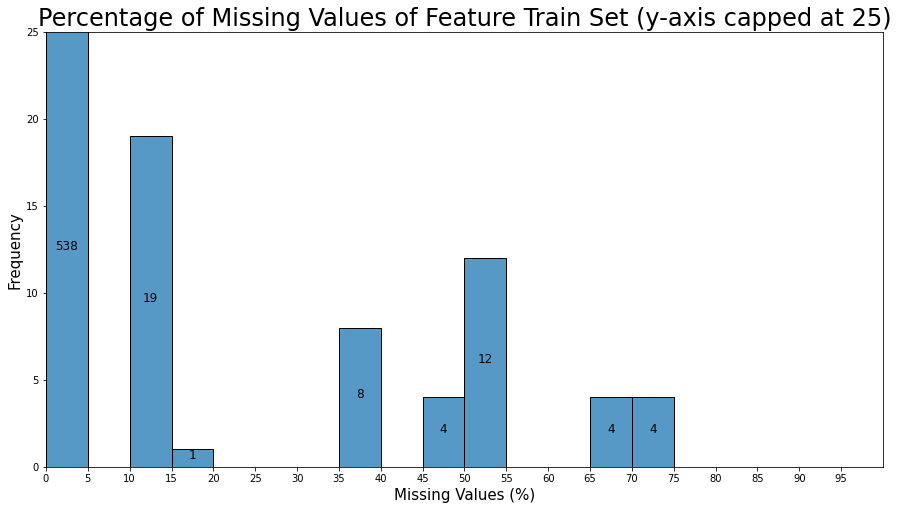

In [570]:
plt.figure(figsize = (15,8))

missingval_chart = sns.histplot(descriptive_train, x="missing_percentage", binwidth=5, stat='count',legend=True)
missingval_chart.set_title('Percentage of Missing Values of Feature Train Set (y-axis capped at 25)', fontdict={'size':24})
missingval_chart.set_xlabel('Missing Values (%)',fontdict={'size':15})
missingval_chart.set_ylabel('Frequency', fontdict={'size':15})
missingval_chart.set_xticks(range(0,100,5))

for c in missingval_chart.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.0f}' if (h := v.get_height()) != 0 else '' for v in c ]
    
    # set the bar label
    missingval_chart.bar_label(c, labels=labels, fontsize=12, padding=3,label_type='center')
    
plt.ylim(0, 25)
plt.xlim(0,100)

In [571]:
# Number of Features having 50% or more missing values
missing_50 = descriptive_train[descriptive_train["missing_percentage"]>=50]
missing_50_cols = missing_50.index
len(missing_50)

20

## 2. Histogram of Volatilites of Feature Train Set

(0.0, 10.0)

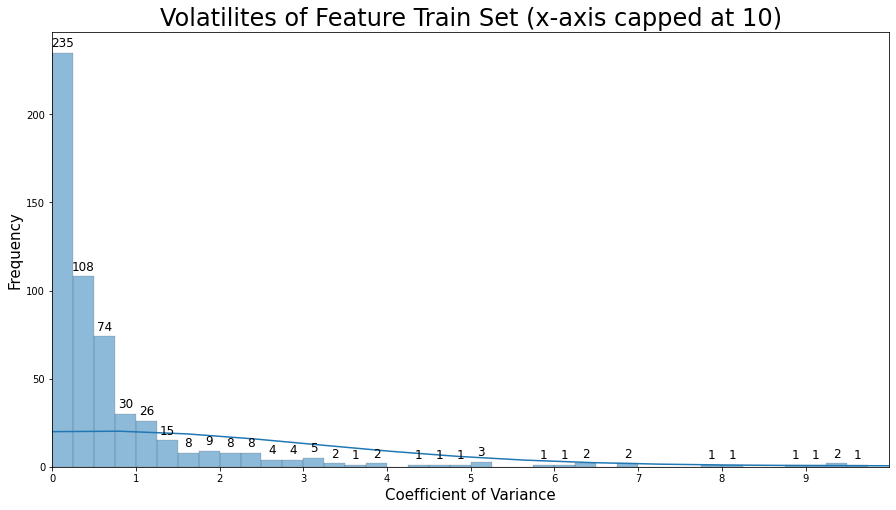

In [572]:
plt.figure(figsize = (15,8))
volatilities_chart1 = sns.histplot(descriptive_train, x="coeff_var", kde=True, binwidth=0.25)
volatilities_chart1.set_title('Volatilites of Feature Train Set (x-axis capped at 10)', fontdict={'size':24})
volatilities_chart1.set_xlabel('Coefficient of Variance',fontdict={'size':15})
volatilities_chart1.set_ylabel('Frequency', fontdict={'size':15})
volatilities_chart1.set_xticks(range(0,10,1))

for c in volatilities_chart1.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.0f}' if (h := v.get_height()) != 0 else '' for v in c ]
    
    # set the bar label
    volatilities_chart1.bar_label(c, labels=labels, fontsize=12, padding=3)

plt.xlim(0,10)

In [573]:
# Select features having 0.25 or less coefficient of variance
coeff_variance_lessthan25percent = descriptive_train[descriptive_train["coeff_var"]<=0.25]
coeff_variance_lessthan25percent

,count,mean,std,min,25%,50%,75%,max,unique,missing_percentage,outliers(3s),outliers(4s),coeff_var
feature0,1246.0,3014.185899,73.067217,2743.2400,2965.6850,3011.4050,3056.2025,3356.3500,1212,0.446713,12.0,2.0,0.024241
feature1,1248.0,2496.611378,80.102790,2162.8700,2454.6825,2500.2200,2539.5950,2846.4400,1207,0.319081,17.0,3.0,0.032085
feature2,1240.0,2200.151328,29.445513,2060.6600,2181.1555,2200.9556,2218.0555,2315.2667,473,0.829611,10.0,6.0,0.013383
feature5,1240.0,100.000000,0.000000,100.0000,100.0000,100.0000,100.0000,100.0000,1,0.829611,NaN,NaN,0.000000
feature6,1237.0,101.251116,6.214884,82.1311,98.1133,101.6111,104.6267,129.2522,474,1.021059,13.0,3.0,0.061381
...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature562,1019.0,262.713735,7.425140,242.2860,260.3010,264.2720,265.7940,299.6200,693,14.932993,3.0,2.0,0.028263
feature563,1017.0,0.680791,0.124176,0.3049,0.5671,0.6511,0.7707,1.2988,636,15.060625,7.0,3.0,0.182400
feature570,1253.0,530.138416,19.258437,317.1964,530.6746,532.3445,534.3564,589.5082,694,0.000000,17.0,14.0,0.036327
feature571,1253.0,2.101757,0.280568,0.9802,1.9812,2.1206,2.2909,2.7395,695,0.000000,29.0,0.0,0.133492


(0.0, 0.25)

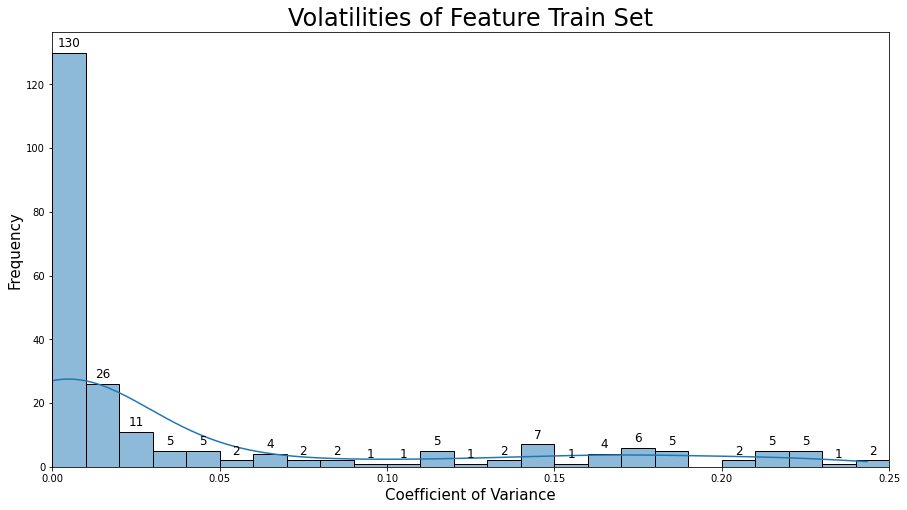

In [576]:
# Plot histogram of features having 0.01 or less coefficient of variance
plt.figure(figsize = (15,8))
volatilities_chart2 = sns.histplot(coeff_variance_lessthan25percent, x="coeff_var", kde=True, binwidth=0.01)
volatilities_chart2.set_title('Volatilities of Feature Train Set', fontdict={'size':24})
volatilities_chart2.set_xlabel('Coefficient of Variance',fontdict={'size':15})
volatilities_chart2.set_ylabel('Frequency', fontdict={'size':15})

for c in volatilities_chart2.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.0f}' if (h := v.get_height()) != 0 else '' for v in c ]
    
    # set the bar label
    volatilities_chart2.bar_label(c, labels=labels, fontsize=12, padding=3)

plt.xlim(0,0.25)

## 3. Constant Features

In [578]:
# Select features having zero coefficient of variance
constant_columns = descriptive_train[descriptive_train["coeff_var"]==0].index
constant_columns

Index(['feature5', 'feature13', 'feature42', 'feature49', 'feature52',
       'feature69', 'feature97', 'feature141', 'feature149', 'feature178',
       ...
       'feature529', 'feature530', 'feature531', 'feature532', 'feature533',
       'feature534', 'feature535', 'feature536', 'feature537', 'feature538'],
      dtype='object', length=116)

In [388]:
X_train[constant_columns]

,feature5,feature13,feature42,feature49,feature52,feature69,feature97,feature141,feature149,feature178,...,feature529,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538
1198,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
635,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1420,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Duplicated Columns

In [309]:
# Create Dataframe for duplicated columns in feature dataset(True/False)
duplicated_df = pd.DataFrame(X_train.transpose().duplicated())

# Change column name
duplicated_df.columns = ["duplicated"]

# Get only True values for duplicated columns
duplicated_columns = duplicated_df[duplicated_df["duplicated"]==True].index

print("Number of duplicated columns = {}".format(len(duplicated_columns)))

Number of duplicated columns = 104


In [387]:
X_train[duplicated_columns]

,feature149,feature179,feature186,feature189,feature191,feature192,feature193,feature194,feature226,feature229,...,feature529,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538
1198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [579]:
# Check how much of duplicated features are contained in constant features
duplicated_columns.isin(constant_columns).sum()

104

## 5. Histogram of Number of Outliers

(0.0, 68.25)

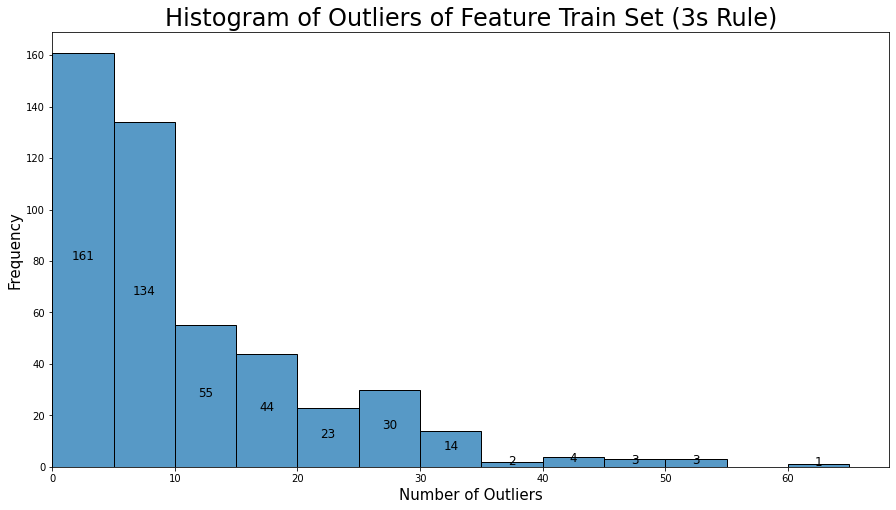

In [580]:
plt.figure(figsize = (15,8))
outliers_chart3s = sns.histplot(descriptive_train, x="outliers(3s)", binwidth=5)
outliers_chart3s.set_title('Histogram of Outliers of Feature Train Set (3s Rule)', fontdict={'size':24})
outliers_chart3s.set_xlabel('Number of Outliers',fontdict={'size':15})
outliers_chart3s.set_ylabel('Frequency', fontdict={'size':15})
for c in outliers_chart3s.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.0f}' if (h := v.get_height()) != 0 else '' for v in c ]
    
    # set the bar label
    outliers_chart3s.bar_label(c, labels=labels, fontsize=12, padding=3,label_type='center')
plt.xlim(0)


(0.0, 52.5)

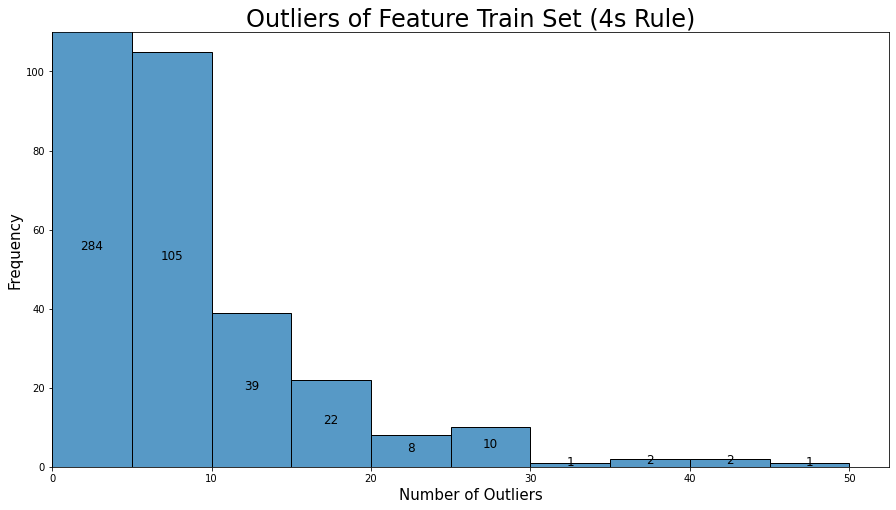

In [596]:
plt.figure(figsize = (15,8))
outliers_chart4s = sns.histplot(descriptive_train, x="outliers(4s)", binwidth=5)
outliers_chart4s.set_title('Outliers of Feature Train Set (4s Rule)', fontdict={'size':24})
outliers_chart4s.set_xlabel('Number of Outliers',fontdict={'size':15})
outliers_chart4s.set_ylabel('Frequency', fontdict={'size':15})

for c in outliers_chart4s.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.0f}' if (h := v.get_height()) != 0 else '' for v in c ]
    
    # set the bar label
    outliers_chart4s.bar_label(c, labels=labels, fontsize=12, padding=3,label_type='center')

plt.ylim(0,110)

plt.xlim(0)


In [581]:
# Total number of outliers based on 4s rule
descriptive_train["outliers(4s)"].sum()

2626.0

In [582]:
# Percentage of outliers based on 4s rule
descriptive_train["outliers(4s)"].sum()/(X_train.shape[0]*X_train.shape[1])*100

0.35521527993831753

## 5. Correlation Heatmap of Features

## Drop constant features

In [591]:
# Drop constant features by excluding them from train set
constant_columns_list = list(constant_columns)
constants_dropped = X_train.drop(constant_columns_list,axis=1)
print("{} columns were dropped".format(X_train.shape[1] - constants_dropped.shape[1]))

116 columns were dropped


Text(0.5, 1.0, 'Correlation Heatmap of Features')

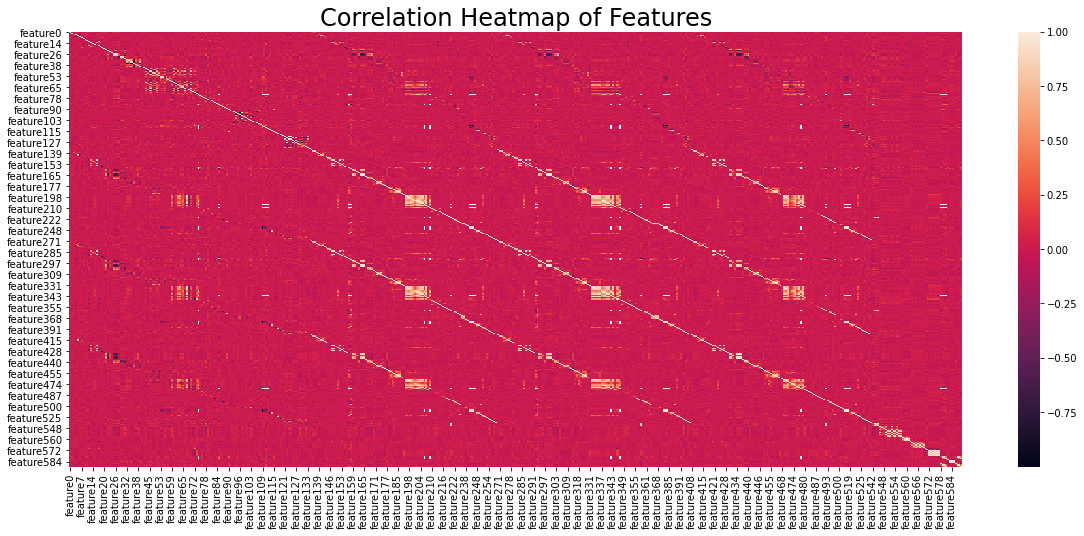

In [562]:
corr = constants_dropped.corr()
# Correlation Heatmap
plt.figure(figsize = (20,8))
correlation_heatmap_constants_dropped = sns.heatmap(corr)
correlation_heatmap_constants_dropped.set_title('Correlation Heatmap of Features', fontdict={'size':24})


In [555]:
cor_matrix = constants_dropped.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [556]:
upper_tri

,feature0,feature1,feature2,feature3,feature4,feature6,feature7,feature8,feature9,feature10,...,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589
feature0,NaN,0.130549,0.005929,0.009370,0.006472,0.020932,0.044486,0.027202,0.013986,0.017257,...,0.021166,0.013639,0.012005,0.032634,0.028529,0.032582,0.029795,0.005240,0.006618,0.007927
feature1,NaN,NaN,0.004635,0.003786,0.003840,0.029392,0.003728,0.030072,0.020676,0.006244,...,0.118484,0.082213,0.036827,0.001015,0.002182,0.000463,0.012106,0.034146,0.026110,0.048011
feature2,NaN,NaN,NaN,0.324772,0.025282,0.149336,0.426344,0.050121,0.015623,0.087811,...,0.029744,0.022267,0.002335,0.018371,0.020411,0.018394,0.043987,0.031072,0.033095,0.028762
feature3,NaN,NaN,NaN,NaN,0.018393,0.679145,0.173874,0.085115,0.062185,0.051228,...,0.040040,0.072315,0.017928,0.028986,0.027228,0.029640,0.023195,0.021031,0.011491,0.052558
feature4,NaN,NaN,NaN,NaN,NaN,0.101254,0.059719,0.000905,0.005277,0.011526,...,0.049584,0.000780,0.041929,0.002576,0.003175,0.002150,0.035783,0.033292,0.031253,0.000430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000377,0.000623,0.000064,0.002886
feature586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142810,0.139838,0.485621
feature587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972767,0.387352
feature588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.388815
